<a href="https://colab.research.google.com/github/Shweta-sharma-1998/TASK_6/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [136]:
df = pd.read_csv("car_data.csv")

In [137]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [138]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [139]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

USE MILEAGE AS FEATURE AND PRICE AS TARGET TO FIND LINEAR REGRESSSION MODEL

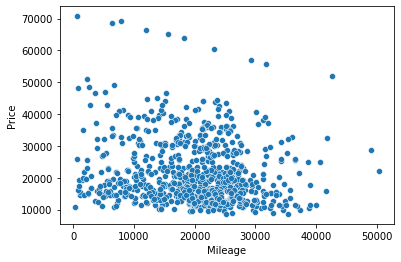

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [140]:
import seaborn as sns
sns.scatterplot(x= df["Mileage"], y= df["Price"])
plt.show()
df[["Mileage", "Price"]].corr()


No linear relationship between Price and mileage. Need of Transformation

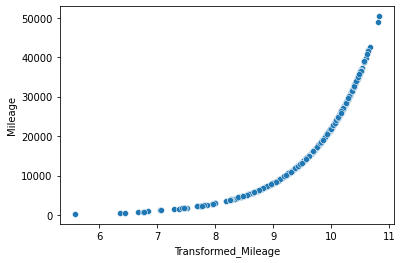

In [141]:
df['Transformed_Mileage']= np.log(df['Mileage'])
sns.scatterplot(x= df['Transformed_Mileage'], y= df['Mileage'])
plt.show()


In [142]:
df[["Transformed_Mileage", "Price"]].corr()

,Transformed_Mileage,Price
Transformed_Mileage,1.000000,-0.145424
Price,-0.145424,1.000000


Even doing Transformation there is no linear realtionship between Mileage and Price

In [143]:
X = df[['Mileage']].values #array of features
y = df['Price'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [144]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 


In [145]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [146]:
print(regressor.intercept_) # c
print(regressor.coef_) # m

21315.85595301999
[-1283.29632169]


In [147]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions


In [148]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,11045.108844,20611.854498
1,12045.920705,21463.587596
2,14703.136868,20805.187876
3,15053.933735,23734.666792
4,12553.071428,19314.184557
...,...,...
156,44084.914212,21113.768645
157,10106.016431,22237.548306
158,12828.030977,21472.211551
159,57154.443437,19876.152787


In [149]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.02872584628111674


Very poor R2-Value

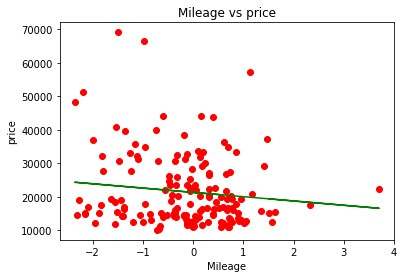

In [150]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "green")
plt.title("Mileage vs price")
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show()

In [151]:
regressor.score(X_test,y_test)

0.02872584628111674

In [152]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  dt= DecisionTreeRegressor(max_depth= depth)
  val= cross_val_score(dt, X, y, cv=10)
  print(depth, accuracy, np.mean(val))

1 0.03157269507626381 -16.14871891815148
2 0.018622824831211027 -15.90773985961197
3 0.02708402518719455 -15.951965978576553
4 0.02528311257469229 -16.28632163410032
5 -0.019092229357378976 -16.37072433451413
6 0.014335548854325975 -16.487382170735795
7 -0.03535164342015462 -16.16697488310952
8 -0.03884560503235801 -16.289226865505274
9 -0.08316250100687039 -16.851299155322064
10 -0.06226882059389638 -16.34824215729936
20 -0.487363607756206 -23.952943643808823
40 -0.5321585764147219 -23.898688852589267
60 -0.5321585764147219 -23.898688852589267


Task 2

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [153]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed_Mileage
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,9.014447
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.119868
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.487669
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,9.701494
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,9.895052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,9.694555
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.857182
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.927399
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,10.165044


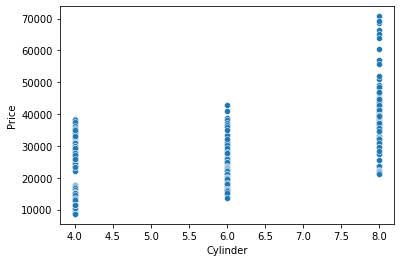

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [154]:
sns.scatterplot(x=df['Cylinder'], y=df['Price'])
plt.show()
df[['Cylinder','Price']].corr()

with Increasing cylinders , price increases , go inline with general knowledge, there is descent correlation so linear relationship exist

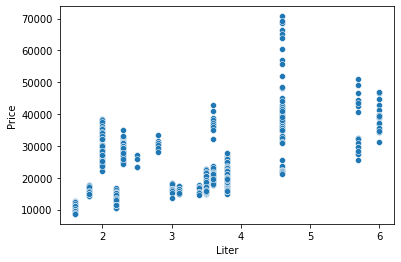

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [155]:
sns.scatterplot(x= df['Liter'], y=df['Price'])
plt.show()
df[['Liter','Price']].corr()

Descent correaltion, So Linear Relationship Exist between price and liter

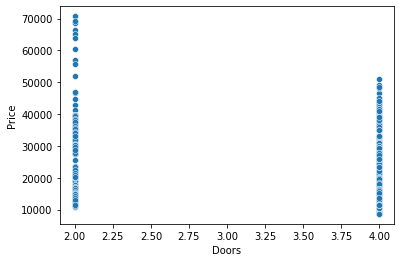

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [156]:
sns.scatterplot(x= df['Doors'], y= df['Price'])
plt.show()
df[['Doors','Price']].corr()

No Linear Relationship Between doors and Price, Need to be transformation

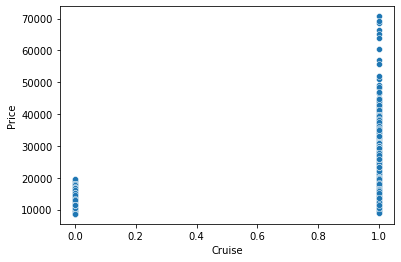

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [157]:
sns.scatterplot(x=df['Cruise'], y=df['Price'])
plt.show()
df[['Cruise','Price']].corr()

Descent correaltion So Linear Relationship Exist

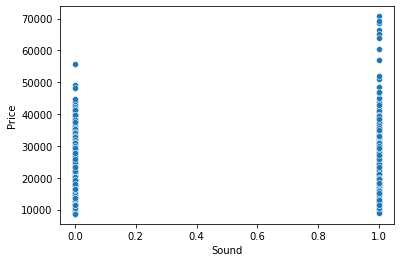

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [158]:
sns.scatterplot(x=df['Sound'], y=df['Price'])
plt.show()
df[['Sound','Price']].corr()

Bad correlation , No Linear Relationship

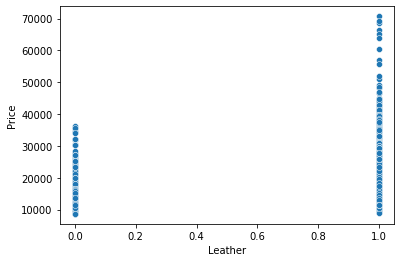

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [159]:
sns.scatterplot(x=df['Leather'], y=df['Price'])
plt.show()
df[['Leather','Price']].corr()

No Correlation between Leather and Price. So no Linear realtionship Exist.

There is a linear relation between (Price, Cylinder) and (Price, Liter) and (Price, Cruise). No transformation required in these.
[ ]


In [160]:
X = df[['Cylinder', 'Liter', 'Cruise', 'Doors','Sound', 'Mileage','Leather']].values #array of features
y = df['Price'].values

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [162]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [164]:
print(regressor.intercept_ )# c 
print(regressor.coef_)

21315.855953019993
[ 4773.01976639  -469.51721744  2648.25501421 -1177.92487375
  -856.21027855 -1106.46566823  1536.65264511]


In [165]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,11045.108844,20611.854498
1,12045.920705,21463.587596
2,14703.136868,20805.187876
3,15053.933735,23734.666792
4,12553.071428,19314.184557
...,...,...
156,44084.914212,21113.768645
157,10106.016431,22237.548306
158,12828.030977,21472.211551
159,57154.443437,19876.152787


Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [166]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.02872584628111674


Find the combination of the factors that is the best predictor for price

In [167]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage','Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Cylinder,4773.019766
Liter,-469.517217
Cruise,2648.255014
Doors,-1177.924874
Sound,-856.210279
Mileage,-1106.465668
Leather,1536.652645



According to the coefficients of the features Cylinder, Cruise, Leather, Mileage are the best features to predict the price of car.

Hard Mode
1) Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [168]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed_Mileage
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,9.014447
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.119868
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,9.487669
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,9.701494
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,9.895052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,9.694555
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.857182
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,9.927399
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,10.165044


In [169]:
df= df.drop(columns= ["Transformed_Mileage"])

In [170]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [171]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [172]:
df["Type"].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [173]:
dummies1 = pd.get_dummies(df["Make"])
dummies2 = pd.get_dummies(df["Model"])
dummies3 = pd.get_dummies(df["Type"])


In [174]:
df= pd.concat([df,dummies1,dummies2, dummies3], axis="columns")

In [175]:
df.shape

(804, 55)

In [176]:
df= df.drop(["Make","Model","Type","Trim"], axis= 1)

In [177]:
X= df.drop(["Price"], axis="columns")
Y= df["Price"]

In [178]:
X.shape, Y.shape

((804, 50), (804,))

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=10)

In [180]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((643, 50), (161, 50), (643,), (161,))

In [181]:
df.dtypes

Price          float64
Mileage          int64
Cylinder         int64
Liter          float64
Doors            int64
Cruise           int64
Sound            int64
Leather          int64
Buick            uint8
Cadillac         uint8
Chevrolet        uint8
Pontiac          uint8
SAAB             uint8
Saturn           uint8
9-2X AWD         uint8
9_3              uint8
9_3 HO           uint8
9_5              uint8
9_5 HO           uint8
AVEO             uint8
Bonneville       uint8
CST-V            uint8
CTS              uint8
Cavalier         uint8
Century          uint8
Classic          uint8
Cobalt           uint8
Corvette         uint8
Deville          uint8
G6               uint8
GTO              uint8
Grand Am         uint8
Grand Prix       uint8
Impala           uint8
Ion              uint8
L Series         uint8
Lacrosse         uint8
Lesabre          uint8
Malibu           uint8
Monte Carlo      uint8
Park Avenue      uint8
STS-V6           uint8
STS-V8           uint8
Sunfire    

In [182]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9810360980255105

In [186]:
from sklearn.metrics import r2_score
accuracy= r2_score(Y_test,lr.predict(X_test))
accuracy

0.9810360980255105

In [183]:
Y_pred= lr.predict(X_test)

In [184]:
print(lr.intercept_)
print(lr.coef_)

25812.02302872007
[-1.79012126e-01  7.64012560e+02  7.54855447e+02 -1.32298625e+03
 -8.30240420e+01  3.15325498e+02  3.29929085e+02 -3.01257985e+03
  1.30920604e+04 -4.81025517e+03 -4.59434371e+03  4.44365165e+03
 -5.11853330e+03 -2.78971269e+03  2.43698638e+02  1.47767176e+03
  3.44470698e+03  2.06728697e+03 -5.45854632e+03  5.84533351e+02
  4.32796691e+03 -6.88501665e+03 -4.16046387e+03 -4.83575294e+03
 -2.97756385e+03 -3.35229308e+03  1.27412486e+04 -3.19817230e+03
  3.07452732e+02  6.20228590e+03 -4.14778912e+03 -1.58825662e+03
  6.39263469e+02 -2.77281663e+03 -2.34571667e+03  1.96746235e+02
 -1.19170690e+03 -2.38343888e+03  1.41538747e+02  2.81813376e+03
 -7.79758546e+01  2.83539102e+03 -4.55207662e+03 -1.40049334e+03
  1.60898672e+04  3.48134954e+03 -2.81985642e+03 -4.69411915e+02
 -5.49115250e+02  3.57034040e+02]


In [185]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"]) 
Y_predict= lr.predict(X_test)
coef_df

,Coefficient
Mileage,-0.179012
Cylinder,764.012560
Liter,754.855447
Doors,-1322.986251
Cruise,-83.024042
Sound,315.325498
Leather,329.929085
Buick,-3012.579846
Cadillac,13092.060381
Chevrolet,-4810.255173
